# Seasonal Auto Regressive Integrated Moving Average $SARIMA(p, d, q, P, D, Q)_s$

Sometime, time series processes are characterized by systematic trends. ARMA models do not take trend into consideration. We need to remove these trend, usually by taking the difference between terms. When the order of the difference is **d**, then   

**ARMA(p, q)** process becomes **ARIMA(p, d, q)** 

**Recall ARMA(p,q):** 

$$\theta (B)Z_t = \phi (B)X_t$$

**If we need to take the difference d times then we can write**

$$\phi (B)\Delta^dX_t = \theta (B)Z_t$$ 

or

$$\phi (B)(1-B)^dX_t = \theta (B)Z_t$$ 

Differencing will remove the trend and transform the process into an ARMA. Things that may suggest differencing are: 

- Slow decay in AIC
- Systematic change in variance. In this case, we need to apply a transformation (e.g log) before differencing

#### Simulated Example ARIMA

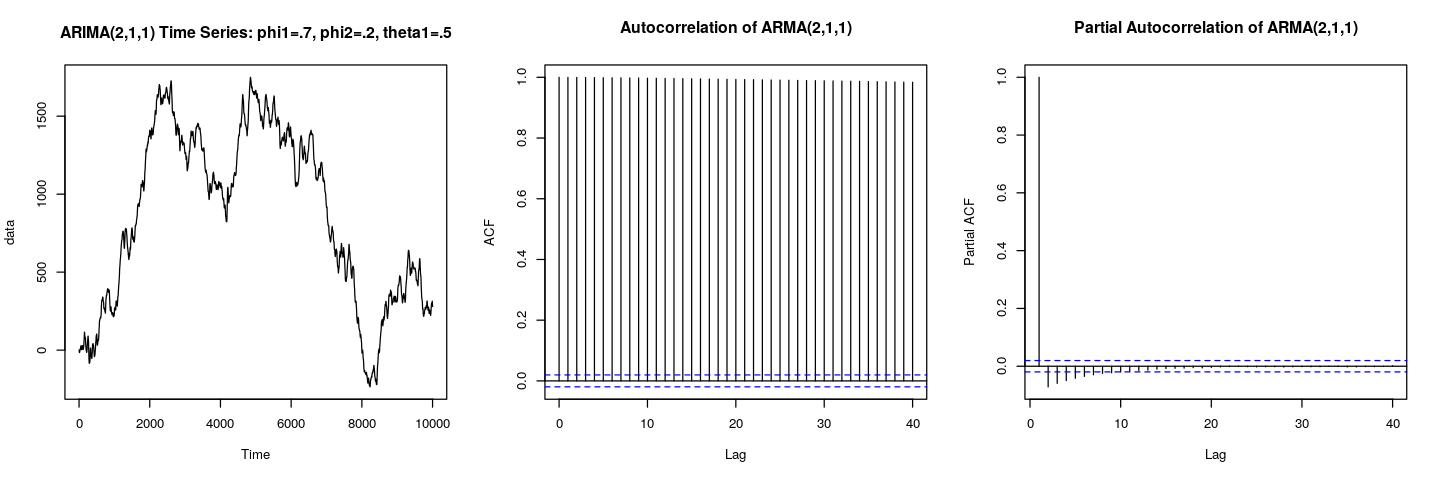

In [1]:
options(repr.plot.width=12, repr.plot.height=4)
set.seed(5)
# parameters
phi=c(.7, .2)
theta=0.5
sigma=3
m=10000

data=arima.sim(n=m,list(order = c(2,1,1), ar = phi, ma=theta))

par(mfcol = c(1,3))
plot(data, main="ARIMA(2,1,1) Time Series: phi1=.7, phi2=.2, theta1=.5") #first terms
acf(data, main="Autocorrelation of ARMA(2,1,1)")
acf(data, type="partial", main="Partial Autocorrelation of ARMA(2,1,1)")

**Observations:**  
- There are trends in the time series
- ACF decays really slowy
- We need to **de-trend** the series

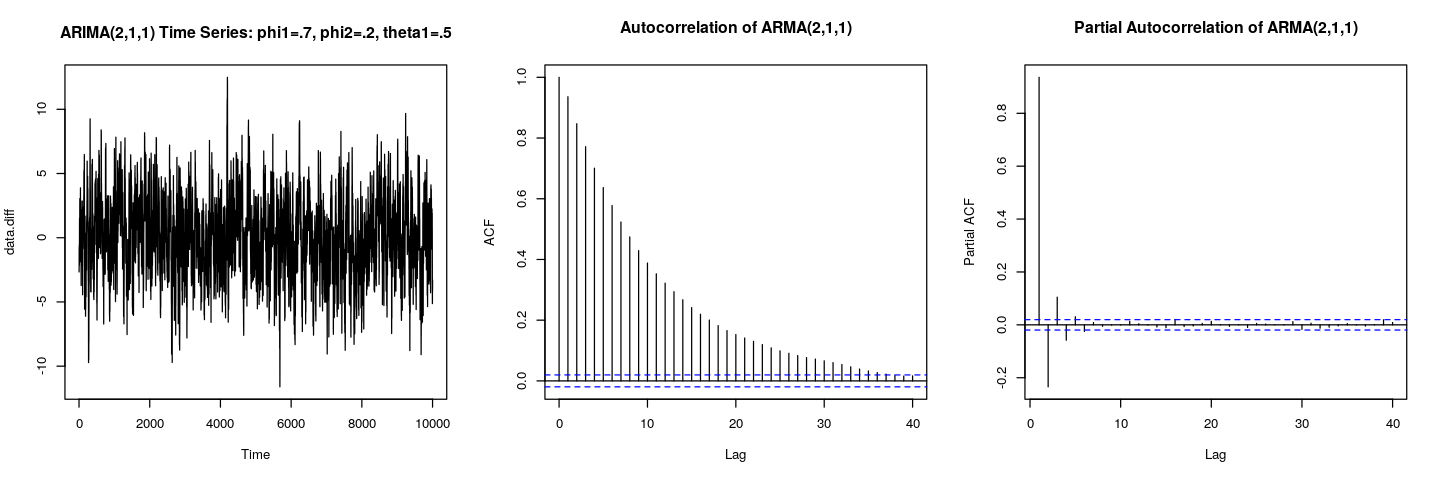

In [2]:
data.diff = diff(data, differences=1)
par(mfcol = c(1,3))
plot(data.diff, main="ARIMA(2,1,1) Time Series: phi1=.7, phi2=.2, theta1=.5") #first terms
acf(data.diff, main="Autocorrelation of ARMA(2,1,1)")
acf(data.diff, type="partial", main="Partial Autocorrelation of ARMA(2,1,1)")

The ACF suggests AR order 4 after differencing, equivalent to ARMA(4,0,0)

In [3]:
fit1<-arima(data.diff, order=c(4,0,0))
fit1


Call:
arima(x = data.diff, order = c(4, 0, 0))

Coefficients:
         ar1      ar2     ar3      ar4  intercept
      1.1862  -0.3761  0.1733  -0.0581     0.0280
s.e.  0.0100   0.0154  0.0154   0.0100     0.1353

sigma^2 estimated as 1.025:  log likelihood = -14313.1,  aic = 28638.2

Let's try other models

In [4]:
fit2<-arima(data.diff, order=c(2,0,1))
fit2


Call:
arima(x = data.diff, order = c(2, 0, 1))

Coefficients:
         ar1    ar2     ma1  intercept
      0.6876  0.204  0.5002     0.0280
s.e.  0.0334  0.032  0.0301     0.1398

sigma^2 estimated as 1.023:  log likelihood = -14305.92,  aic = 28621.83

The AIC of the ARMA(2,0,1) is smaller than that of ARMA(4, 0, 0). This is expected because we have a simulated ARIMA(2,1,1) process, which after differencing should be ARMA(2,0,1)   

Let's try ARIMA(2,1,1) on the original model (without differencing)

In [5]:
fit3<-arima(data, order=c(2,1,1))
fit3


Call:
arima(x = data, order = c(2, 1, 1))

Coefficients:
         ar1     ar2     ma1
      0.6876  0.2039  0.5001
s.e.  0.0334  0.0320  0.0301

sigma^2 estimated as 1.023:  log likelihood = -14305.93,  aic = 28619.85

It is very similar to ARMA(2,0,1) after taking the difference.

**Using auto.arima instead of manual grid search**  

R offers a method to automatically find the best parameters. This is requires the library **forecast**
```R
intall.packages(forecast)
library(forecast)
```

### Conclusion

We have seen that  
- When there is trend in the time series, we need to **de-trend** by taking the difference 
- If the variance is not constant, we need to perform a transformation (typically log) before **de-trend**